In [8]:
import pandas as pd
import numpy as np
import altair as alt
import warnings
warnings.filterwarnings('ignore')

## Descriptive Statistic


In [20]:
df_1=pd.read_csv('DrugReview_numbers.csv', sep=',')

In [21]:
df_1.nunique()

Unnamed: 0      160397
Unnamed: 0.1    160397
uniqueID        160397
drugName          3417
condition          811
review          112106
rating              10
date              3579
usefulCount        389
review1         104844
review-list     104844
VAD_neg            642
VAD_neu            774
VADpos             651
VAD_compound     16252
Ratings              3
Ratings_C            3
dtype: int64

#### 1. Does the community has a more positive feeling?
#### ->Distribution of ratings -Table and Chart?

In [23]:
distribution= df_1.groupby('rating')[['uniqueID']].count()
distribution['Frequency']= round(distribution['uniqueID']/ distribution['uniqueID'].sum()*100,1)
distribution

,uniqueID,Frequency
rating,,
1,21506,13.4
2,6885,4.3
3,6470,4.0
4,4974,3.1
5,7961,5.0
6,6296,3.9
7,9399,5.9
8,18787,11.7
9,27371,17.1


#### -> Overall Rating Distribution -Chart

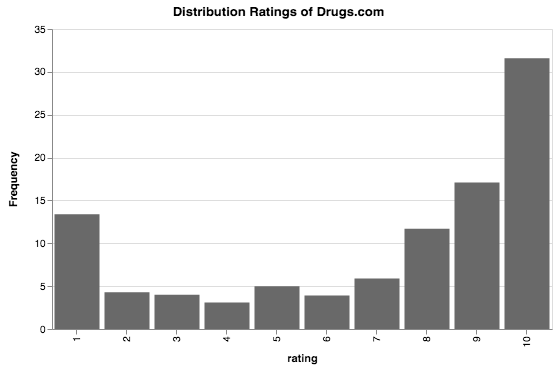

In [17]:
alt.Chart(distribution.reset_index(), title = 'Distribution Ratings of Drugs.com').mark_bar(color='dimgray').encode(
x=alt.X('rating:O'),
y= alt.Y('Frequency:Q')).properties(width=500)

#### 2. What are the most frequent conditions/drugs?

In [40]:
k= df1.groupby('condition')[['uniqueID']].count()
k[['uniqueID']].sort_values(by = 'uniqueID',ascending= False)[:20]

,uniqueID
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
Bipolar Disorde,4224
Insomnia,3673
Weight Loss,3609
Obesity,3568


In [41]:
k= df1.groupby('drugName')[['uniqueID']].count()
k[['uniqueID']].sort_values(by='uniqueID', ascending= False)[:20]

,uniqueID
drugName,
Levonorgestrel,3657
Etonogestrel,3336
Ethinyl estradiol / norethindrone,2850
Nexplanon,2149
Ethinyl estradiol / norgestimate,2117
Ethinyl estradiol / levonorgestrel,1888
Phentermine,1543
Sertraline,1360
Escitalopram,1292


####  3.Are there any difference of text length for the ratings?

In [28]:
df_1['Length of Review']= df['review'].apply(lambda row: len(row))

length= df_1.groupby('Ratings_C')[['Length of Review']].mean()

length['Length of Review']= round(length['Length of Review'],1)

length

,Length of Review
Ratings_C,
4 < Rating <7,460.3
Rating <= 4,459.4
Rating>=7,458.2


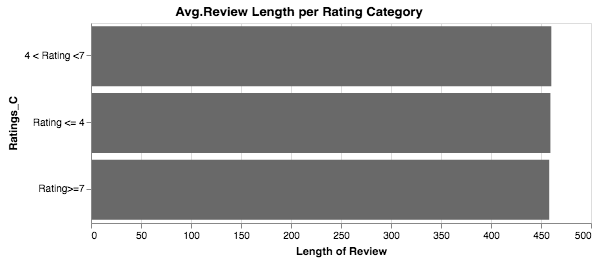

In [29]:
alt.Chart(length.reset_index(), title='Avg.Review Length per Rating Category').mark_bar(color='dimgray').encode(
x=alt.X('Length of Review:Q'
),
y=alt.Y('Ratings_C:N')).properties(height=200, width=500)

#### No particular difference due to rating, could there be a potential effect in respect to the conditions

In [44]:
# Table structure for conditions and ratings
conditions=['Birth Control', 'Depression','Pain', 'Anxiety', 'Diabetes, Type 2']
condition_df= df_1[df_1['condition'].isin(conditions)]

vis_condition_df=condition_df.groupby(['Ratings_C','condition']).agg({'Ratings_C':'count','Length of Review':'mean'})

vis_condition_df.rename(columns={'Ratings_C':'Frequency_of Ratings'}, inplace=True)

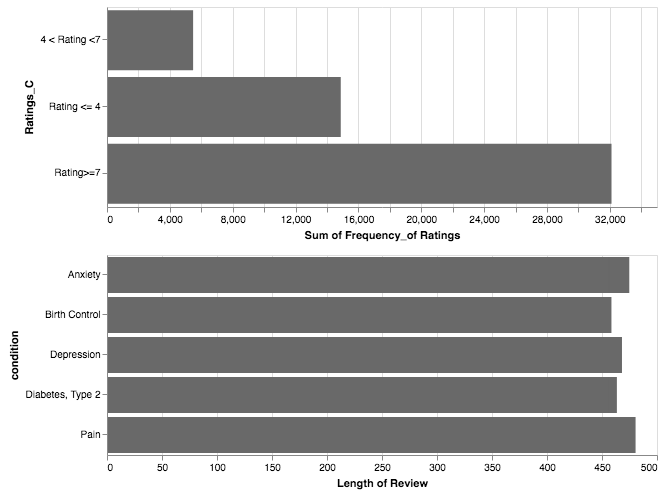

In [35]:
#Visulalization

brush = alt.selection(type='single', encodings=['y'], on='mouseover', nearest=True)

main = alt.Chart().mark_bar().encode(
x='sum(Frequency_of Ratings)',
y= 'Ratings_C:O',
color= alt.ColorValue("dimgrey")).add_selection(brush).interactive().properties(width=550, height=200)


bars= alt.Chart().mark_bar().encode(
y='condition:O',
color=alt.condition(brush, alt.ColorValue("dimgrey"), alt.ColorValue("grey")),

x='Length of Review').transform_filter(brush).properties(selection=brush, width=550, height=200)

alt.vconcat(main, bars, data= vis_condition_df.reset_index(level=[0,1]))